# Project Overview

Accurately forecasting sales is a critical challenge faced by retailers worldwide, as it directly impacts inventory management, resource allocation, and customer satisfaction.

This project focuses on forecasting sales for a drug store chain in Germany, comprising 1,115 stores, by leveraging sales data, store-specific information, and contextual factors such as promotions and holidays.
The goal of this project is to predict six weeks of daily sales through detailed data preprocessing, exploratory analysis, and predictive modelling. 
 
The findings aim to assist retailers, in this case the Rossmann chain, in optimizing operations, improving strategic planning, and adapting to market dynamics, ultimately driving growth and enhancing customer satisfaction.

This notebook demonstrates a complete workflow for forecasting daily sales for a German drug store chain. 
It includes data loading, preprocessing, feature engineering, exploratory data analysis, model training with a Random Forest regressor, and evaluation of results with insights on feature importance.

This notebook is completely candid in a way that shows my approach of work and thinking process.

In [2]:
#importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datasets

This project utilizes three datasets that form the foundation of the sales forecasting model. Each dataset plays a unique role in providing insights into sales patterns and influencing actors

In [3]:
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv') 

<ipython-input-3-ab0afdc82fa1>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


# Store Dataset

 This dataset provides detailed information about individual stores, such as store type, product assortment, competition distance etc.

In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
#percentages of missing values
store_df.isnull().mean() * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [7]:
#checking the number of missing values in each column
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
#checking the number of unique values in each column
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

# Train Dataset

 The training dataset contains historical sales data for each store. It includes features such as the number of customers, promotions, holidays, and dates, which help capture temporal patterns and customer behaviour over time.

In [9]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
#checking the number of missing values in each column
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
#checking the number of unique values in each column
train_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

# Test Dataset

The test dataset provides similar information as the train dataset, excluding the sales and customers column.

In [13]:
test_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [14]:
test_df.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [16]:
test_df.nunique()

Store            856
DayOfWeek          7
Date              48
Sales              0
Customers          0
Open               2
Promo              2
StateHoliday       2
SchoolHoliday      2
dtype: int64

# Raw Data to Ready Data

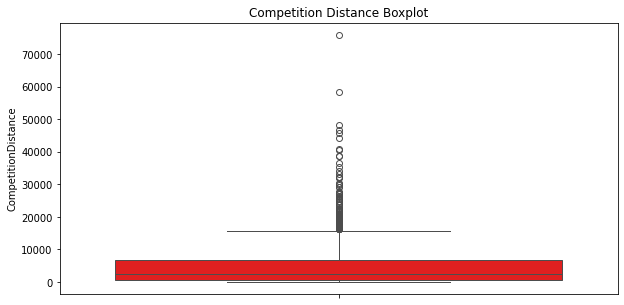

In [17]:
# Plot distribution of CompetitionDistance (store dataset)
plt.figure(figsize=(10, 5))
sns.boxplot(store_df['CompetitionDistance'], color ='red')
plt.title("Competition Distance Boxplot")
plt.show()


In [18]:
# Impute with median 
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)


<ipython-input-18-f8758ab98e5d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)


In [19]:
#checking the number of missing values in each column after imputation
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<ipython-input-20-fe5fe1fcb6a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CompetitionOpenSinceMonth', data=store_df, palette='viridis')


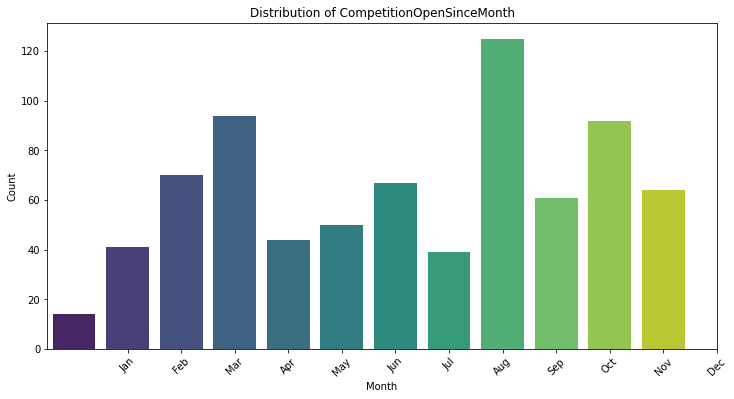

<ipython-input-20-fe5fe1fcb6a0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CompetitionOpenSinceYear', data=store_df, palette='viridis')


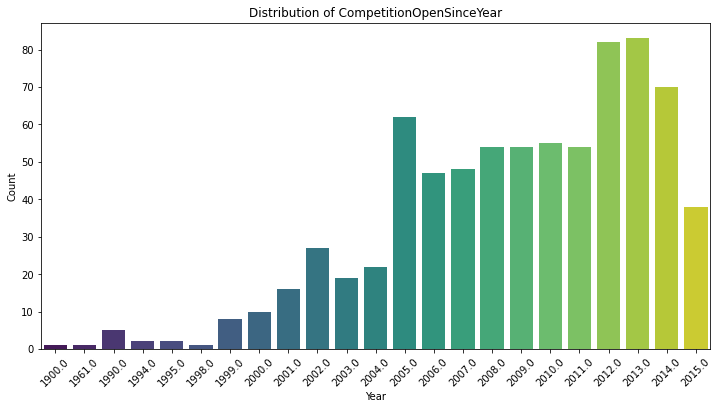

In [20]:
# Check distribution of CompetitionOpenSinceMonth
plt.figure(figsize=(12, 6))
sns.countplot(x='CompetitionOpenSinceMonth', data=store_df, palette='viridis')
plt.title("Distribution of CompetitionOpenSinceMonth")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Check distribution of CompetitionOpenSinceYear
plt.figure(figsize=(12, 6))
sns.countplot(x='CompetitionOpenSinceYear', data=store_df, palette='viridis')
plt.title("Distribution of CompetitionOpenSinceYear")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Fill with mode
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)


<ipython-input-21-1930ab3dbe8a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
<ipython-input-21-1930ab3dbe8a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [22]:
# Fill missing Promo2SinceWeek and Promo2SinceYear with 0
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna(0, inplace=True)


<ipython-input-22-3946b287648c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['Promo2SinceWeek'].fillna(0, inplace=True)
<ipython-input-22-3946b287648c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [23]:
#checking the number of missing values in each column after imputations
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [24]:
# Map the values in StateHoliday to integers
state_holiday_mapping = {
    '0': 0,  # String '0' becomes integer 0
    0: 0,    # Integer 0 remains 0
    'a': 1,  # Public holiday
    'b': 2,  # Easter holiday
    'c': 3   # Christmas holiday
}

# Apply the mapping
train_df['StateHoliday'] = train_df['StateHoliday'].map(state_holiday_mapping)

# Check the unique values to confirm the transformation
print("Unique values in StateHoliday after mapping:", train_df['StateHoliday'].unique())


Unique values in StateHoliday after mapping: [0 1 2 3]


In [25]:
# Filter out rows where the store is closed (Open = 0)
train_df = train_df[train_df['Open'] != 0]

# Reset the index after filtering (optional)
train_df.reset_index(drop=True, inplace=True)

# Check the updated dataset
print(f"Number of rows after removing closed stores: {train_df.shape[0]}")


Number of rows after removing closed stores: 844392


In [26]:
# Identify date columns in the dataset
date_columns = train_df.select_dtypes(include=['object']).columns

# Loop through the columns and convert to datetime if possible
for col in date_columns:
    try:
        train_df[col] = pd.to_datetime(train_df[col])
        print(f"Column '{col}' successfully converted to datetime.")
    except Exception as e:
        print(f"Column '{col}' could not be converted: {e}")

# Check the updated dataset
print(train_df.info())  # Verify the datatype changes


Column 'Date' successfully converted to datetime.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844392 non-null  int64         
 1   DayOfWeek      844392 non-null  int64         
 2   Date           844392 non-null  datetime64[ns]
 3   Sales          844392 non-null  int64         
 4   Customers      844392 non-null  int64         
 5   Open           844392 non-null  int64         
 6   Promo          844392 non-null  int64         
 7   StateHoliday   844392 non-null  int64         
 8   SchoolHoliday  844392 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 58.0 MB
None


<ipython-input-26-1dd011897ce6>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df[col] = pd.to_datetime(train_df[col])


<ipython-input-27-f1f22b7441f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette='viridis')


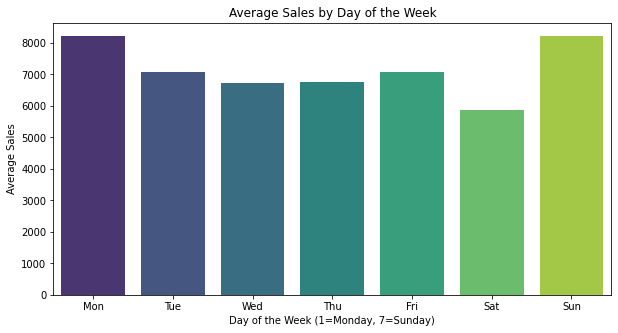

In [27]:
# Calculate average sales by DayOfWeek
avg_sales_by_day = train_df.groupby('DayOfWeek')['Sales'].mean()

# Plot average sales by DayOfWeek
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette='viridis')
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Sales")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


<ipython-input-28-73ea950a7d74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


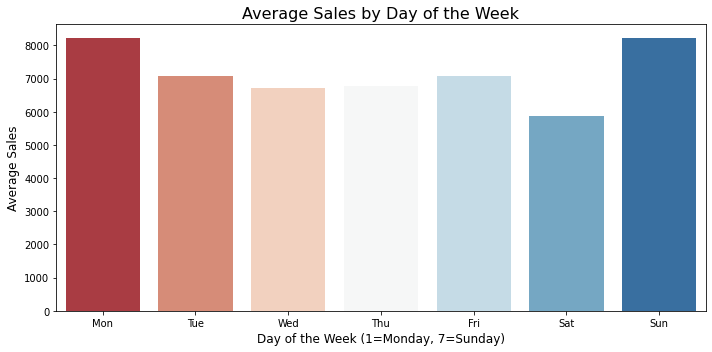

In [28]:
# Calculate average sales by DayOfWeek
avg_sales_by_day = train_df.groupby('DayOfWeek')['Sales'].mean()

# Plot average sales by DayOfWeek with blue-to-red color gradient
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_sales_by_day.index, 
    y=avg_sales_by_day.values, 
    palette=sns.color_palette("RdBu", len(avg_sales_by_day))  # Blue-to-red color shade
)
plt.title("Average Sales by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], fontsize=10)
plt.tight_layout()
plt.show()


In [29]:
# Define mappings for StoreType and Assortment
store_type_mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
assortment_mapping = {'a': 1, 'b': 2, 'c': 3}

# Map the values in the columns to the corresponding integers
store_df['StoreType'] = store_df['StoreType'].map(store_type_mapping)
store_df['Assortment'] = store_df['Assortment'].map(assortment_mapping)

# Check the updated dataset
print("Unique values in StoreType:", store_df['StoreType'].unique())
print("Unique values in Assortment:", store_df['Assortment'].unique())


Unique values in StoreType: [3 1 4 2]
Unique values in Assortment: [1 3 2]


In [30]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,3,3,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0


# Adding New Features

**Seasons:**
This was derived from the Date column by mapping months into four seasons: Winter(Dec-Feb), Spring(Mar-May), Summer(Jun-Aug), and Fall(Sep-Nov), and subsequently encoded. This feature captures seasonal sales trends influenced by customer behavior. 

**Competition Duration:**
 This was derived from the Date column by mapping months into four seasons: Winter(Dec-Feb), Spring(Mar-May), Summer(Jun-Aug), and Fall(Sep-Nov), and subsequently encoded. This feature captures seasonal sale trends influenced by customer behaviour. 

**Promo Years:**
This represents the number of years a store has been participating in the Promo2 program. It highlights the long-term impact of promotional activities on sales.

In [31]:
# Function to determine season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Ensure 'Date' is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Add 'Season' column to train_df
train_df['Season'] = train_df['Date'].dt.month.apply(get_season)

# Add 'Season' column to test_df
test_df['Season'] = test_df['Date'].dt.month.apply(get_season)

# Check the updated datasets
print("Train dataset with Season column:")
print(train_df[['Date', 'Season']].head())

print("\nTest dataset with Season column:")
print(test_df[['Date', 'Season']].head())


<ipython-input-31-d97daae11239>:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_df['Date'] = pd.to_datetime(test_df['Date'])


Train dataset with Season column:
        Date  Season
0 2015-07-31  Summer
1 2015-07-31  Summer
2 2015-07-31  Summer
3 2015-07-31  Summer
4 2015-07-31  Summer

Test dataset with Season column:
        Date Season
0 2015-09-17   Fall
1 2015-09-17   Fall
2 2015-09-17   Fall
3 2015-09-17   Fall
4 2015-09-17   Fall


In [32]:
train_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 1
Promo                2
StateHoliday         4
SchoolHoliday        2
Season               4
dtype: int64

In [33]:
test_df.nunique()


Store            856
DayOfWeek          7
Date              48
Sales              0
Customers          0
Open               2
Promo              2
StateHoliday       2
SchoolHoliday      2
Season             2
dtype: int64

In [34]:

# Set a reference date for calculations (e.g., today's date)
reference_date = pd.to_datetime('2025-01-01')

# Ensure CompetitionOpenSinceYear and CompetitionOpenSinceMonth are filled
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(1, inplace=True)  # Default to January if missing

# Calculate competition start date
store_df['CompetitionStartDate'] = pd.to_datetime(
    store_df['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' +
    store_df['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-01',
    errors='coerce'
)

# Calculate competition_duration (in months) since the competition started
store_df['competition_duration'] = ((reference_date - store_df['CompetitionStartDate']).dt.days // 30).clip(lower=0)

# Ensure Promo2SinceYear and Promo2SinceWeek are filled
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(1, inplace=True)

# Calculate promo start date
store_df['Promo2StartDate'] = pd.to_datetime(
    store_df['Promo2SinceYear'].astype(int).astype(str) + '-01-01', errors='coerce'
) + pd.to_timedelta(store_df['Promo2SinceWeek'].astype(int) * 7 - 7, unit='d')

# Fill missing Promo2StartDate with the reference date (to indicate promo participation started recently)
store_df['Promo2StartDate'].fillna(reference_date, inplace=True)

# Calculate promo_years (in years) since the store started participating in Promo2
store_df['promo_years'] = ((reference_date - store_df['Promo2StartDate']).dt.days // 365).clip(lower=0)

# Drop intermediate columns if no longer needed
store_df.drop(columns=['CompetitionStartDate', 'Promo2StartDate'], inplace=True)

# Check the updated store dataset
print(store_df[['competition_duration', 'promo_years']].head())


   competition_duration  promo_years
0                   198            0
1                   209           14
2                   220           13
3                   186            0
4                   118            0


<ipython-input-34-14ad775722f6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
<ipython-input-34-14ad775722f6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [35]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competition_duration,promo_years
0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,198,0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",209,14
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",220,13
3,4,3,3,620.0,9.0,2009.0,0,0.0,0.0,0,186,0
4,5,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0,118,0


In [36]:
test_df.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
Season               0
dtype: int64

In [37]:
# Mapping of seasons to numeric values
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}

# Convert 'Season' in train dataset
train_df['Season'] = train_df['Season'].map(season_mapping)

# Convert 'Season' in test dataset
test_df['Season'] = test_df['Season'].map(season_mapping)

# Verify the transformation
print("Train dataset 'Season' column unique values:", train_df['Season'].unique())
print("Test dataset 'Season' column unique values:", test_df['Season'].unique())


Train dataset 'Season' column unique values: [3 2 1 4]
Test dataset 'Season' column unique values: [4 3]


# Let’s Visualize?

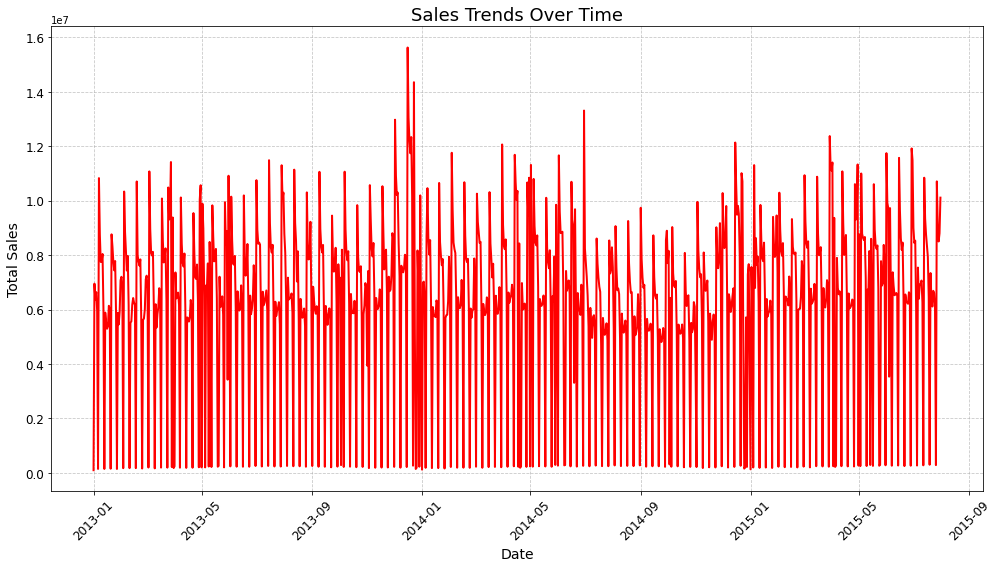

In [38]:

# Ensure 'Date' column is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Aggregate sales by date
sales_trend = train_df.groupby('Date')['Sales'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(14, 8))
plt.plot(sales_trend['Date'], sales_trend['Sales'], color='red', linewidth=2)
plt.title('Sales Trends Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-39-1690c96595ed>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=sales_by_day, palette='coolwarm')


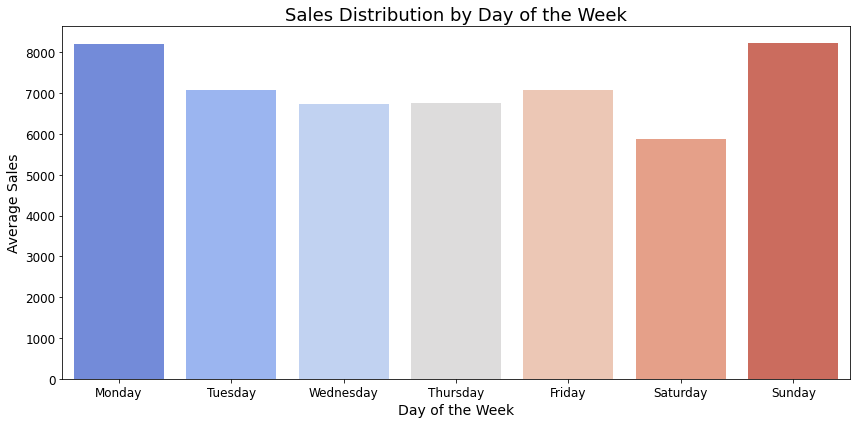

In [39]:

# Group sales by DayOfWeek
sales_by_day = train_df.groupby('DayOfWeek')['Sales'].mean().reset_index()

# Map DayOfWeek numbers to names (assuming Monday = 1, Sunday = 7)
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
sales_by_day['DayOfWeek'] = sales_by_day['DayOfWeek'].map(day_mapping)

# Sort by weekday order
sales_by_day['DayOfWeek'] = pd.Categorical(sales_by_day['DayOfWeek'], categories=list(day_mapping.values()), ordered=True)
sales_by_day = sales_by_day.sort_values('DayOfWeek')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=sales_by_day, palette='coolwarm')
plt.title('Sales Distribution by Day of the Week', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-40-f63d29e6150e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=promo_sales, palette='RdBu')


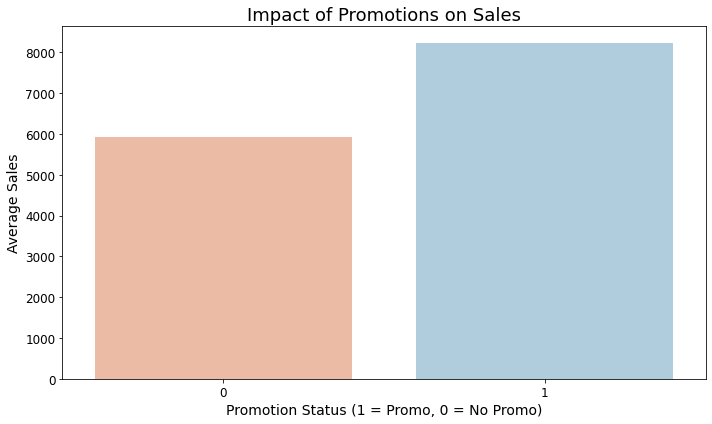

In [40]:

# Group sales by Promo status (1 = Promotion, 0 = No Promotion)
promo_sales = train_df.groupby('Promo')['Sales'].mean().reset_index()

# Plot a bar chart to compare sales with and without promotions
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_sales, palette='RdBu')
plt.title('Impact of Promotions on Sales', fontsize=18)
plt.xlabel('Promotion Status (1 = Promo, 0 = No Promo)', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-41-96e502a14841>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StateHoliday', y='Sales', data=state_holiday_sales, palette='coolwarm')


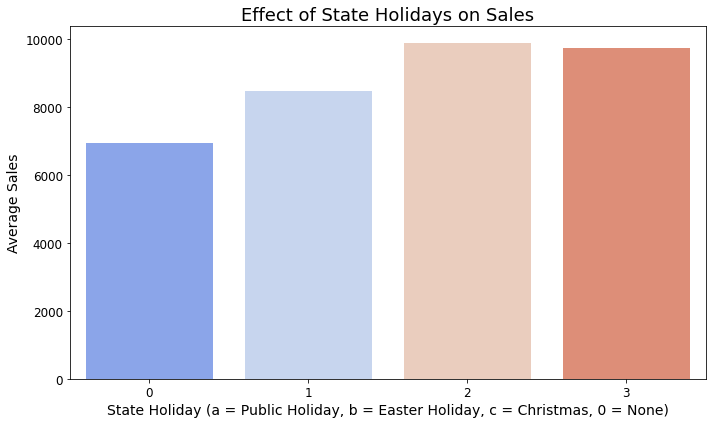

In [41]:
# Group by StateHoliday and calculate average sales
state_holiday_sales = train_df.groupby('StateHoliday')['Sales'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=state_holiday_sales, palette='coolwarm')
plt.title('Effect of State Holidays on Sales', fontsize=18)
plt.xlabel('State Holiday (a = Public Holiday, b = Easter Holiday, c = Christmas, 0 = None)', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Merging Datasets

Store dataset was merged using left join with train and test datasets individually on the Store Column to combine relevant information from multiple sources into a single dataset for analysis and modelling.


In [42]:


# Merge datasets
# Left join to ensure all train/test rows are retained even if store info is missing
train_merged = train_df.merge(store_df, on='Store', how='left')
test_merged = test_df.merge(store_df, on='Store', how='left')

# Check for missing stores in the merged datasets
missing_train_stores = train_merged[train_merged['Store'].isnull()]
missing_test_stores = test_merged[test_merged['Store'].isnull()]

print(f"Missing stores in train dataset after merge: {missing_train_stores.shape[0]}")
print(f"Missing stores in test dataset after merge: {missing_test_stores.shape[0]}")

# Display merged dataset previews
print("Train Dataset (merged) preview:")
print(train_merged.head())

print("\nTest Dataset (merged) preview:")
print(test_merged.head())




Missing stores in train dataset after merge: 0
Missing stores in test dataset after merge: 0
Train Dataset (merged) preview:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  Season  ...  Assortment  CompetitionDistance  \
0              1       3  ...           1               1270.0   
1              1       3  ...           1                570.0   
2              1       3  ...           1              14130.0   
3              1       3  ...           3                620.0   
4              1       3  ...           1              29910.0   

   

<ipython-input-43-a4349ce5c1fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


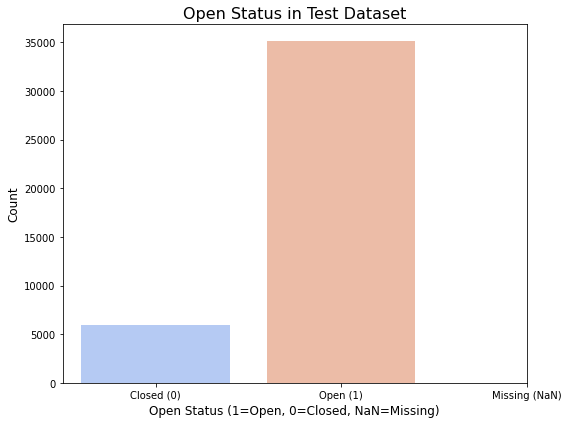

In [43]:

# Count open, closed, and missing values in the "Open" column
open_status = test_merged['Open'].value_counts(dropna=False)

# Plot the open status as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=open_status.index, 
    y=open_status.values, 
    palette="coolwarm"
)
plt.title("Open Status in Test Dataset", fontsize=16)
plt.xlabel("Open Status (1=Open, 0=Closed, NaN=Missing)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Closed (0)", "Open (1)", "Missing (NaN)"], fontsize=10)
plt.tight_layout()
plt.show()



In [44]:
train_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Season,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competition_duration,promo_years
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,1,1270.0,9.0,2008.0,0,0.0,0.0,0,198,0
1,2,5,2015-07-31,6064,625,1,1,0,1,3,...,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",209,14
2,3,5,2015-07-31,8314,821,1,1,0,1,3,...,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",220,13
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,3,620.0,9.0,2009.0,0,0.0,0.0,0,186,0
4,5,5,2015-07-31,4822,559,1,1,0,1,3,...,1,29910.0,4.0,2015.0,0,0.0,0.0,0,118,0


<ipython-input-45-a206bf73b2b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='StoreType', y='Sales', data=train_merged, palette='coolwarm', scale='width', inner='box')
<ipython-input-45-a206bf73b2b1>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='StoreType', y='Sales', data=train_merged, palette='coolwarm', scale='width', inner='box')


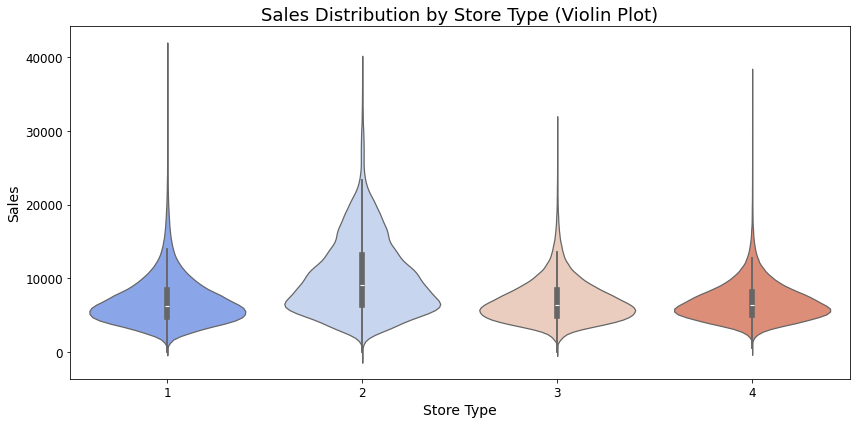

In [45]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='StoreType', y='Sales', data=train_merged, palette='coolwarm', scale='width', inner='box')
plt.title('Sales Distribution by Store Type (Violin Plot)', fontsize=18)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Train Merged Dataset Checks

In [46]:
train_merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Season                       0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
competition_duration         0
promo_years                  0
dtype: int64

In [47]:
train_merged.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
Season                           4
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
competition_duration           170
promo_years                      8
dtype: int64

In [48]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  int64         
 8   SchoolHoliday              844392 non-null  int64         
 9   Season                     844392 non-null  int64         
 10  StoreType                  844392 non-null  int64         
 11  Assortment                 844392 non-null  int64   

# Test Merged Dataset Checks

In [49]:
test_merged.nunique()

Store                        856
DayOfWeek                      7
Date                          48
Sales                          0
Customers                      0
Open                           2
Promo                          2
StateHoliday                   2
SchoolHoliday                  2
Season                         2
StoreType                      4
Assortment                     3
CompetitionDistance          555
CompetitionOpenSinceMonth     12
CompetitionOpenSinceYear      23
Promo2                         2
Promo2SinceWeek               22
Promo2SinceYear                8
PromoInterval                  4
competition_duration         159
promo_years                    8
dtype: int64

In [50]:
test_merged.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                        41088
Customers                    41088
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
Season                           0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
competition_duration             0
promo_years                      0
dtype: int64

In [51]:
test_merged.isnull().mean()*100

Store                          0.000000
DayOfWeek                      0.000000
Date                           0.000000
Sales                        100.000000
Customers                    100.000000
Open                           0.026772
Promo                          0.000000
StateHoliday                   0.000000
SchoolHoliday                  0.000000
Season                         0.000000
StoreType                      0.000000
Assortment                     0.000000
CompetitionDistance            0.000000
CompetitionOpenSinceMonth      0.000000
CompetitionOpenSinceYear       0.000000
Promo2                         0.000000
Promo2SinceWeek                0.000000
Promo2SinceYear                0.000000
PromoInterval                  0.000000
competition_duration           0.000000
promo_years                    0.000000
dtype: float64

# Correlation Heatmap

Promo and Sales(0.37): Promotions have a noticeable positive impact. This feature is critical for capturing the effect of marketing campaigns on sales.

DayOfWeek and Sales(-0.18): Including this feature will help the model account for day-specific fluctuations in sales, which is crucial for forecasting.

Promo(0.37) and DayOfWeek(-0.18) have the strongest correlations with sales, making them essential for capturing promotional and temporal trends. 
 
While individual correlations of Features like  Assortment and StoreType with sales are weak, their combined effects can enhance model performance by accounting for external and store-specific factors.


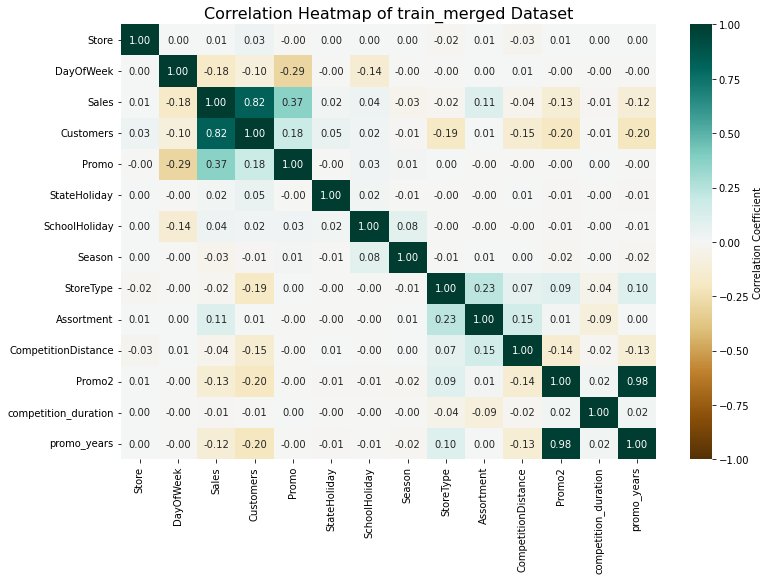

In [52]:

# Drop 'PromoInterval' from the dataset before calculating the correlation matrix
columns_to_exclude = ['PromoInterval', 'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Open']
numerical_columns = train_merged.drop(columns=columns_to_exclude).select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    fmt='.2f',   # Format for correlation values
    cmap='BrBG',  # Color scheme
    vmin=-1, vmax=1,  # Correlation range
    cbar_kws={'label': 'Correlation Coefficient'}  # Colorbar label
)

# Add a title
plt.title('Correlation Heatmap of train_merged Dataset', fontsize=16)

# Show the plot
plt.show()


**Store being closed (open=0) will have no impact on sales. Hence those rows were dropped**

<ipython-input-53-f58e4b87cbae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


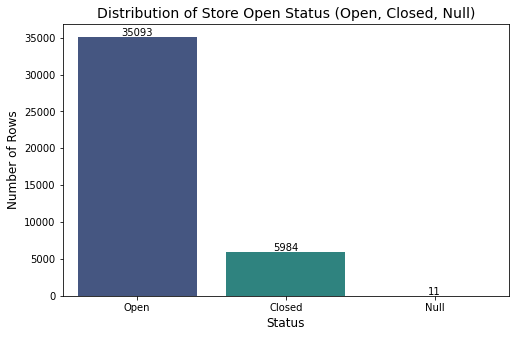

In [53]:
# Manually count values
open_count = test_merged['Open'].eq(1).sum()  # Count where Open = 1
closed_count = test_merged['Open'].eq(0).sum()  # Count where Open = 0
null_count = test_merged['Open'].isna().sum()  # Count where Open is NaN

# Data for the bar chart
categories = ['Open', 'Closed', 'Null']
counts = [open_count, closed_count, null_count]

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=counts, palette='viridis')

# Add labels and title
plt.title("Distribution of Store Open Status (Open, Closed, Null)", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)

# Annotate bar chart with counts
for i, value in enumerate(counts):
    plt.text(i, value + 100, f"{value}", ha='center', fontsize=10)

# Show the plot
plt.show()


In [54]:
# Drop rows where 'Open' is null
test_merged = test_merged.dropna(subset=['Open'])

# Reset the index after dropping rows (optional)
test_merged.reset_index(drop=True, inplace=True)

# Check the number of rows after dropping
print(f"Number of rows after dropping null values: {test_merged.shape[0]}")


Number of rows after dropping null values: 41077


In [55]:
# Drop rows where 'Open' is 0
test_merged = test_merged[test_merged['Open'] != 0]

# Reset the index after dropping rows (optional)
test_merged.reset_index(drop=True, inplace=True)

# Check the number of rows after dropping
print(f"Number of rows after dropping 'Open = 0': {test_merged.shape[0]}")


Number of rows after dropping 'Open = 0': 35093


In [56]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35093 entries, 0 to 35092
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      35093 non-null  int64         
 1   DayOfWeek                  35093 non-null  int64         
 2   Date                       35093 non-null  datetime64[ns]
 3   Sales                      0 non-null      float64       
 4   Customers                  0 non-null      float64       
 5   Open                       35093 non-null  float64       
 6   Promo                      35093 non-null  int64         
 7   StateHoliday               35093 non-null  object        
 8   SchoolHoliday              35093 non-null  int64         
 9   Season                     35093 non-null  int64         
 10  StoreType                  35093 non-null  int64         
 11  Assortment                 35093 non-null  int64         
 12  Comp

In [57]:
test_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Season,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,competition_duration,promo_years
0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,4,...,1,1270.0,9.0,2008.0,0,0.0,0.0,0,198,0
1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,4,...,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",220,13
2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,4,...,3,24000.0,4.0,2013.0,0,0.0,0.0,0,143,0
3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,4,...,1,7520.0,10.0,2014.0,0,0.0,0.0,0,124,0
4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,4,...,3,2030.0,8.0,2000.0,0,0.0,0.0,0,297,0


**Mapping the fields**

In [58]:
# Replace 'a' with 1 in the 'StateHoliday' column
test_merged['StateHoliday'] = test_merged['StateHoliday'].replace({'a': 1})

# Verify the transformation
print(test_merged['StateHoliday'].unique())


['0' 1]


In [59]:
# Ensure the column is numeric
test_merged['StateHoliday'] = test_merged['StateHoliday'].astype(float).fillna(0).astype(int)

# Verify the transformation
print(test_merged['StateHoliday'].unique())


[0 1]


In [60]:
train_merged.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
Season                           4
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
competition_duration           170
promo_years                      8
dtype: int64

In [61]:
test_merged.nunique()

Store                        856
DayOfWeek                      7
Date                          48
Sales                          0
Customers                      0
Open                           1
Promo                          2
StateHoliday                   2
SchoolHoliday                  2
Season                         2
StoreType                      4
Assortment                     3
CompetitionDistance          555
CompetitionOpenSinceMonth     12
CompetitionOpenSinceYear      23
Promo2                         2
Promo2SinceWeek               22
Promo2SinceYear                8
PromoInterval                  4
competition_duration         159
promo_years                    8
dtype: int64

# Time To Predict Future

The model decided for the prediction is Random Forest Regressor as it can handle both numerical and categorical data without requiring extensive preprocessing. It is effective at dealing with outliers compared to linear or logistic Regression since it builds multiple tree splits rather than fitting exact data points which minimizes the effect of outliers.

One of the key challenges in the analysis was the absence of customer data in the test dataset, despite customers being the most influential predictor of sales, as shown in the heatmap. However, since the test dataset represents future data, customer information was not available in advance.
This limitation meant the model could not directly leverage this crucial feature for sales predictions. 
To address this, a two-step approach was used - first predicting customers and then using the predicted values as a feature to forecast sales. 

In [62]:
# Prepare data to predict Customers
features_customers = ['DayOfWeek', 'CompetitionDistance', 'Promo', 'Assortment', 'StoreType', 'StateHoliday', 'competition_duration']

# Train and test sets for Customers prediction
X_train_b_customers = train_merged[features_customers]
y_train_b_customers = train_merged['Customers']
X_test_b_customers = test_merged[features_customers]

X_train_customers, X_val_customers, y_train_customers, y_val_customers = train_test_split(
    X_train_b_customers, y_train_b_customers, test_size=0.2, random_state=42
)


#Prepare data to predict Sales (including predicted Customers)
features_sales_b = features_customers + ['Customers']  # Include Customers for Sales prediction

# Train and test sets for Sales prediction
X_train_b_sales = train_merged[features_sales_b]
y_train_b_sales = train_merged['Sales']



#Train the Random Forest model to predict Customers
rf_customers = RandomForestRegressor(n_estimators=100, random_state=42)
rf_customers.fit(X_train_customers, y_train_customers)


RandomForestRegressor(random_state=42)

In [63]:
# Train the model to predict Customers
y_val_pred_customers = rf_customers.predict(X_val_customers)
rmse_customers = np.sqrt(mean_squared_error(y_val_customers, y_val_pred_customers))
r2_customers = r2_score(y_val_customers, y_val_pred_customers)
print(f"Validation RMSE for Customers: {rmse_customers}")
print(f"Validation R² for Customers: {r2_customers:.2f}")


# Predict Customers for the test set
test_merged['Predicted_Customers'] = rf_customers.predict(X_test_b_customers)
print("Customers predicted for test set. Sample output:")
print(test_merged[['Predicted_Customers']].head())


Validation RMSE for Customers: 122.17591466662856
Validation R² for Customers: 0.91
Customers predicted for test set. Sample output:
   Predicted_Customers
0           568.227205
1           833.291261
2           981.795946
3           851.259082
4           587.897981


In [64]:
features_sales_b = features_customers + ['Predicted_Customers']
X_test_b_sales = test_merged[features_sales_b]

X_test_b_sales.isnull().sum()

DayOfWeek               0
CompetitionDistance     0
Promo                   0
Assortment              0
StoreType               0
StateHoliday            0
competition_duration    0
Predicted_Customers     0
dtype: int64

In [70]:
X_test_b_sales.head()

,DayOfWeek,CompetitionDistance,Promo,Assortment,StoreType,StateHoliday,competition_duration,Predicted_Customers
0,4,1270.0,1,1,3,0,198,568.227205
1,4,14130.0,1,1,1,0,220,833.291261
2,4,24000.0,1,3,1,0,143,981.795946
3,4,7520.0,1,1,1,0,124,851.259082
4,4,2030.0,1,3,1,0,297,587.897981


In [65]:
test_merged.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                        35093
Customers                    35093
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
Season                           0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
competition_duration             0
promo_years                      0
Predicted_Customers              0
dtype: int64

In [73]:
# Add Predicted_Customers to test features for Sales prediction

X_train, X_val, y_train, y_val = train_test_split(X_train_b_sales, y_train_b_sales, test_size=0.2, random_state=42)


# Train the model to predict Sales
rf_sales = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sales.fit(X_train, y_train)

#  Evaluate the model on validation data
y_val_pred = rf_sales.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: {rmse}")
print(f"Validation R^2: {r2}")


Validation RMSE: 576.7296069239076
Validation R^2: 0.9655096199860399


In [90]:
X_test_b_sales.isnull().sum()


DayOfWeek                   0
CompetitionDistance         0
Promo                       0
Assortment                  0
StoreType                   0
StateHoliday                0
competition_duration        0
Customers               35093
Customers                   0
dtype: int64

In [94]:
test_merged['Predicted_Sales'] = rf_sales.predict(X_test_b_sales)
print("Sales predicted for test set. Sample output:")
print(test_merged[['Predicted_Sales']].head())

Sales predicted for test set. Sample output:
   Predicted_Sales
0      5237.155333
1      7866.010000
2      9683.380000
3      6985.940000
4      6786.160000


In [ ]:
feature_importances = pd.DataFrame({
    'Feature': features_sales_b,
    'Importance': rf_sales.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                Feature  Importance
7   Predicted_Customers    0.748597
1   CompetitionDistance    0.093504
4             StoreType    0.059794
6  competition_duration    0.035941
2                 Promo    0.034601
0             DayOfWeek    0.014023
3            Assortment    0.013244
5          StateHoliday    0.000296


                Feature  Importance
7   Predicted_Customers    0.748597
1   CompetitionDistance    0.093504
4             StoreType    0.059794
6  competition_duration    0.035941
2                 Promo    0.034601
0             DayOfWeek    0.014023
3            Assortment    0.013244
5          StateHoliday    0.000296


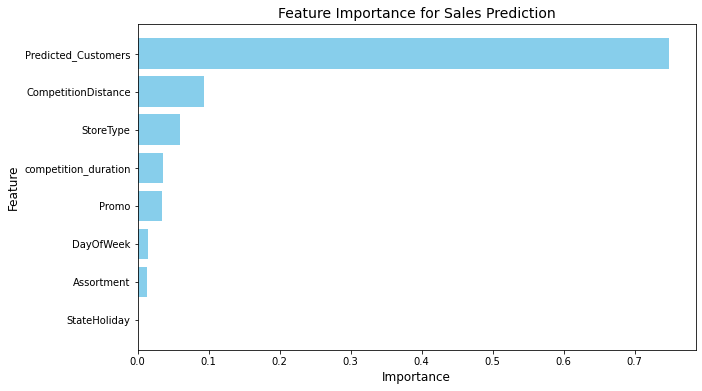

In [ ]:
# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': features_sales_b,
    'Importance': rf_sales.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance for Sales Prediction', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


# Prediciting Sales directly without Customer data in Test Dataset

In [ ]:
# Define features (X) and target (y) from train_merged
predictors = ['DayOfWeek', 'CompetitionDistance', 'promo_years', 'Season', 'Promo', 'Assortment', 'StoreType', 'StateHoliday']
X = train_merged[predictors]
y = train_merged['Sales']  # Target variable

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in CompetitionDistance in both train and test datasets (if any)
X_train['CompetitionDistance'].fillna(X_train['CompetitionDistance'].median(), inplace=True)
X_val['CompetitionDistance'].fillna(X_val['CompetitionDistance'].median(), inplace=True)
test_merged['CompetitionDistance'].fillna(test_merged['CompetitionDistance'].median(), inplace=True)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Calculate RMSE (Root Mean Squared Error) on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")

# Calculate R² score (accuracy percentage)
r2 = r2_score(y_val, y_val_pred)
accuracy = r2 * 100
print(f"Validation Accuracy: {accuracy:.2f}%")

# Predict on test dataset
X_test = test_merged[predictors]
test_predictions = rf_model.predict(X_test)

# Save predictions to a DataFrame for review
test_merged['PredictedSales'] = test_predictions
print(test_merged[['Promo2', 'DayOfWeek', 'CompetitionDistance', 'PredictedSales']].head())




<ipython-input-59-807bfb88e855>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['CompetitionDistance'].fillna(X_train['CompetitionDistance'].median(), inplace=True)
<ipython-input-59-807bfb88e855>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['CompetitionDistance'].fillna(X_train['CompetitionDistance'].median(), inplace=T

Validation RMSE: 1446.2328310670705
Validation Accuracy: 78.31%
   Promo2  DayOfWeek  CompetitionDistance  PredictedSales
0       0          4               1270.0     6811.648652
1       1          4              14130.0     7852.353427
2       0          4              24000.0     8799.469287
3       0          4               7520.0     7039.465903
4       0          4               2030.0     6580.778962


In [ ]:
feature_importances = pd.DataFrame({
    'Feature': predictors,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


               Feature  Importance
1  CompetitionDistance    0.520118
4                Promo    0.165959
2          promo_years    0.094191
0            DayOfWeek    0.082187
6            StoreType    0.074620
5           Assortment    0.041276
3               Season    0.019413
7         StateHoliday    0.002236


               Feature  Importance
1  CompetitionDistance    0.520118
4                Promo    0.165959
2          promo_years    0.094191
0            DayOfWeek    0.082187
6            StoreType    0.074620
5           Assortment    0.041276
3               Season    0.019413
7         StateHoliday    0.002236


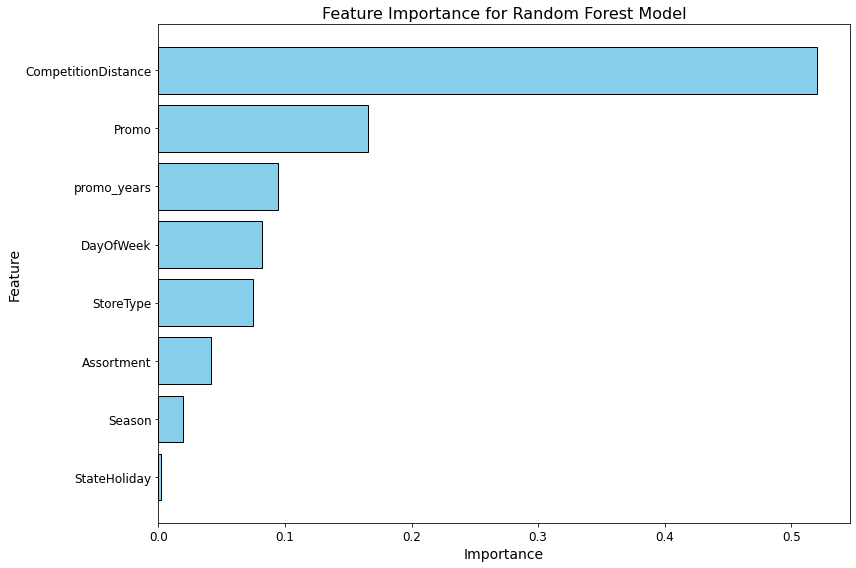

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': predictors,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance for Random Forest Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Most important feature on top
plt.tight_layout()
plt.show()
